In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [2]:
path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed'

file_names = os.listdir(path)
print(len(file_names))

file_paths = []

for file in file_names:
    
    file_path = path + '/' + file
    file_paths.append(file_path)

print(len(file_paths))
file_paths

11
11


['/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/.DS_Store',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_melt.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/DRL_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PD_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PD_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/DRL_trial.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med_boxes/PCA_PD_DRL/round12/processed/PCA_session.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Behavior/med

In [3]:
PCA_melt = pd.read_csv(file_paths[2])
PCA_melt = pd.DataFrame(data = PCA_melt)
PCA_melt_wi = PCA_melt[PCA_melt['part'] == 'within']
PCA_melt_wi = PCA_melt_wi.iloc[1:][['group', 'animal', 'PCA_score_2.6']]

In [9]:
PD_melt = pd.read_csv(file_paths[9])
PD_melt = pd.DataFrame(data = PD_melt)
PD_melt_wi = PD_melt[PD_melt['part'] == 'within']
PD_melt_wi = PD_melt_wi[PD_melt_wi['sub_session'] == 2]
PD_melt_wi = PD_melt_wi.iloc[1:][['group', 'animal', 'high_reward_perc.1', 'high_reward_perc.4', 'high_reward_perc.3', 'high_reward_perc.2', 'high_reward_perc']]

In [10]:
DRL_mean_melt = pd.read_csv(file_paths[10])
DRL_mean_melt = pd.DataFrame(data = DRL_mean_melt)
DRL_mean_melt = DRL_mean_melt.iloc[1:][['group', 'animal', 'DRL_error.2', 'DRL_error', 'DRL_error.1']]

In [13]:
final_melt_wi = PCA_melt_wi.merge(PD_melt_wi, on=['group', 'animal',]).merge(DRL_mean_melt, on=['group', 'animal',])

In [14]:
final_melt_wi.columns = ['group', 'animal', 'PCA2', 'PD100', 'PD75', 'PD50', 'PD25', 'PD0', 'DRL5', 'DRL15', 'DRL30']
final_melt_wi['DRL5'] = final_melt_wi['DRL5'].astype('float')
final_melt_wi['DRL15'] = final_melt_wi['DRL15'].astype('float')
final_melt_wi['DRL30'] = final_melt_wi['DRL30'].astype('float')
final_melt_wi

,group,animal,PCA2,PD100,PD75,PD50,PD25,PD0,DRL5,DRL15,DRL30
0,4.0,1118.0,-0.515000,64.285714,58.333333,62.500000,54.166667,20.833333,0.305106,0.342426,0.794039
1,4.0,1119.0,-0.520000,61.538462,68.181818,25.000000,47.619048,22.727273,0.148884,0.385220,0.535030
2,4.0,1120.0,0.000000,63.157895,45.454545,45.000000,33.333333,0.000000,0.180425,0.122327,0.562685
3,4.0,1121.0,-0.536667,83.333333,58.823529,50.000000,4.166667,4.166667,0.160974,0.164583,0.617734
4,4.0,1123.0,-0.680000,66.666667,87.500000,100.000000,62.500000,54.166667,0.122700,0.507811,0.878031
5,4.0,1124.0,-0.468889,78.260870,80.000000,47.368421,76.470588,41.666667,0.262440,0.323923,0.735609
6,4.0,1215.0,-0.940000,94.736842,90.909091,66.666667,37.500000,29.166667,0.159263,NaN,NaN
7,4.0,1216.0,-0.600000,95.454545,100.000000,75.000000,69.565217,50.000000,0.334551,NaN,NaN
8,4.0,1217.0,-0.840000,22.222222,70.588235,54.166667,50.000000,4.166667,0.176787,NaN,NaN
9,4.0,1221.0,-0.760000,45.454545,45.000000,59.090909,25.000000,0.000000,0.291174,NaN,NaN


In [17]:
exclude_no_100 = [1116, 1217, 1221, 1222, 1236, 1239, 1240]
final_melt_wi_exclude = final_melt_wi[~final_melt_wi['animal'].isin(exclude_no_100)]
final_melt_wi_exclude['group'].value_counts()

5.0    10
4.0     9
Name: group, dtype: int64

<AxesSubplot:>

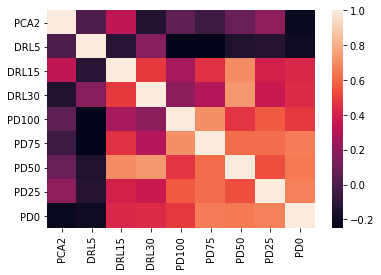

In [22]:
sns.heatmap(final_melt_wi_exclude[['PCA2', 'DRL5', 'DRL15', 'DRL30', 'PD100', 'PD75', 'PD50', 'PD25', 'PD0',]].corr())

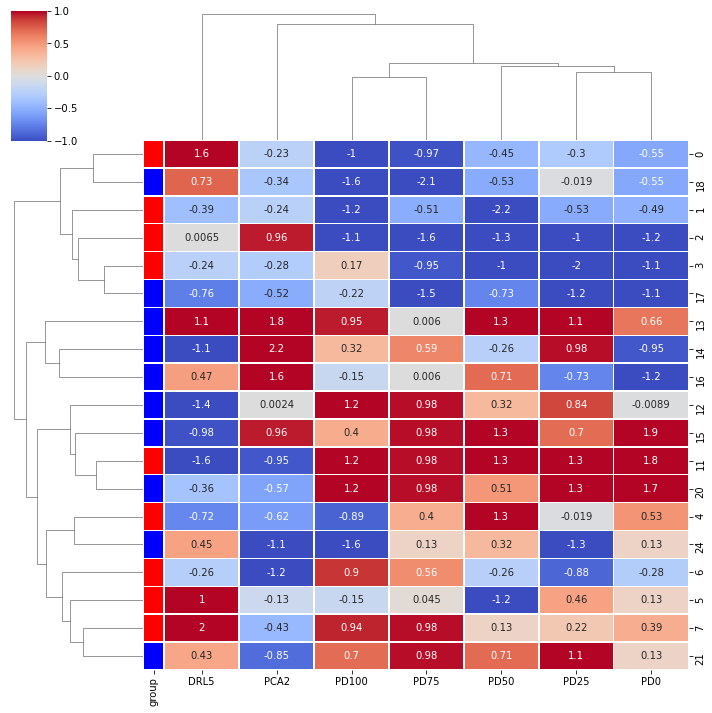

In [26]:
lut = dict(zip(final_melt_wi_exclude['group'].unique(), "rbg"))
row_colors = final_melt_wi_exclude['group'].map(lut)
g = sns.clustermap(final_melt_wi_exclude[['PCA2', 'DRL5', 'PD100', 'PD75', 'PD50', 'PD25', 'PD0',]].dropna(), row_colors=row_colors,
                  z_score=1,
               annot=True, vmin=-1, vmax=1, center=0, cmap = 'coolwarm', 
               square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


In [ ]:
sns.clustermap(data_4h_blood.set_index(['Group', 'Ship', 'Sample', 'Animal', 'TP']).dropna(axis=1),
               metric="euclidean",  method="ward", z_score=1,
               annot=True, vmin=-1, vmax=1, center=0, cmap = 'coolwarm', 
               square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
pd_exclude = [1217,1221,1222,1236,1239,1240]
data_int_exclude = data_int[~data_int['animal'].isin(pd_exclude)]
sns.catplot(x='probability', y='high_reward_perc', data=data_int_exclude, kind='bar', hue='group', col='sub_session', ci=68)
plt.show()

In [ ]:
data_int = PD_melt[PD_melt['part'] == 'within']
for animal in PD_melt[PD_melt['part'] == 'within']['animal'].unique():
    print(animal)
    sns.catplot(x='probability', y='high_reward_perc', data=data_int[data_int['animal'] == animal], kind='bar', col='sub_session')
    plt.show()

In [ ]:
df_final = (task.merge(animal_info,
                on=['animal'], how='left'))
df_final.head()

In [ ]:
sns.lineplot(x='trial_num', y='HE_wait', data=task, hue='probability', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='right_lever_latency', data=task, hue='probability', err_style="bars", ci=68)
plt.show()
sns.lineplot(x='trial_num', y='left_lever_latency', data=task, hue='probability', err_style="bars", ci=68)

In [ ]:
#make new df with high reward vs low reward columns by session

pd_df_session = pd.DataFrame()

animals = df_final['animal'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal'] == animal]
    
    #generate session df
    sessions = animal_data['probability'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['probability'] == session]
        
        #generate session df
        sub_sessions = animal_data_session['sub_session'].unique()
    
        for sub in sub_sessions:
            #get sub_session data for animal
            animal_data_sub_session = animal_data_session[animal_data_session['sub_session'] == sub]
            
            pd_df_session_int = pd.DataFrame()
    
            #fill meta data
            pd_df_session_int['date'] = animal_data_sub_session['date'].unique()
            pd_df_session_int['animal'] = animal_data_sub_session['animal'].unique()
            pd_df_session_int['group'] = animal_data_sub_session['group'].unique()
            pd_df_session_int['probability'] = session
            pd_df_session_int['sub_session'] = sub
        
            #compute and fill session data
            if animal_data_sub_session['high_reward_lever'].unique() == 1:
                pd_df_session_int['high_reward_lever'] = 'right'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['right_lever_count'] == 1]['right_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['left_lever_count'] == 1]['left_lever_latency'].mean()
        
            elif animal_data_sub_session['high_reward_lever'].unique() == 2:
                pd_df_session_int['high_reward_lever'] = 'left'
                pd_df_session_int['reinforcement_count'] = animal_data_sub_session['reinforcement_count'].sum()
                pd_df_session_int['high_reward_lever_count'] = animal_data_sub_session['left_lever_count'].sum()
                pd_df_session_int['high_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['left_lever_count'] == 1]['left_lever_latency'].mean()
                pd_df_session_int['low_reward_lever_count'] = animal_data_sub_session['right_lever_count'].sum()
                pd_df_session_int['low_reward_lever_latency_ave'] = animal_data_sub_session[animal_data_sub_session['right_lever_count'] == 1]['right_lever_latency'].mean()
            
            pd_df_session_int['high_reward_prob'] = pd_df_session_int['high_reward_lever_count'] / \
                (pd_df_session_int['high_reward_lever_count'] + pd_df_session_int['low_reward_lever_count']) * 100
            
            pd_df_session = pd_df_session.append(pd_df_session_int)
        
pd_df_session.reset_index(inplace=True, drop=True)    
pd_df_session.head()

In [ ]:
plt.figure(figsize=(16, 6))
g = sns.barplot(x='probability', y='high_reward_lever_latency_ave', data=pd_df_session[pd_df_session['sub_session'] == 2], ci=68, hue='group')

In [ ]:
pd_df_session.to_csv('pd_df_session.csv')

In [ ]:
choice_df = pd_df_session[pd_df_session['sub_session'] == 2]
choice_df = choice_df.drop(['date', 'sub_session'], axis=1)
choice_df.set_index(['animal', 'group', 'probability'], inplace=True)
choice_df.head()

In [ ]:
choice_df = choice_df.unstack(-1)
choice_df.head()

In [ ]:
choice_df.to_csv('choice_df.csv')